In [22]:
from collections import defaultdict
import pandas as pd
import numpy as np
import sqlite3
import pdb
from tkinter import ON
import csv
import os
if not os.path.exists("images"):
    os.mkdir("images")

%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.templates
import seaborn as sns

## Outpatient Descriptive Statistics 

In [65]:
#load data
outpatient_df = pd.read_csv('idea-1/medicare-data/medicare-data/Outpatient_provdr.csv')

In [24]:
outpatient_df.describe()

,Provider Id,Provider Zip Code,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
count,43372.000000,43372.000000,43372.000000,43372.000000,43372.000000
mean,265410.921747,49041.022434,587.980955,1473.994047,265.425586
std,152729.927698,27497.899751,3280.397168,1837.530791,261.260146
min,10001.000000,1040.000000,11.000000,12.643750,7.305000
25%,140043.000000,28645.000000,42.000000,284.610498,74.627714
50%,260091.000000,46342.000000,128.000000,709.995188,139.298570
75%,390101.000000,73101.000000,347.000000,2102.121346,394.211316
max,670061.000000,99801.000000,219042.000000,32105.636360,2062.470526


In [25]:
outpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   APC                                         43372 non-null  object 
 1   Provider Id                                 43372 non-null  int64  
 2   Provider Name                               43372 non-null  object 
 3   Provider Street Address                     43372 non-null  object 
 4   Provider City                               43372 non-null  object 
 5   Provider State                              43372 non-null  object 
 6   Provider Zip Code                           43372 non-null  int64  
 7   Hospital Referral Region (HRR) Description  43372 non-null  object 
 8   Outpatient Services                         43372 non-null  int64  
 9   Average  Estimated Submitted Charges        43372 non-null  float64
 10  Average To

In [26]:
outpatient_df.corr()

,Provider Id,Provider Zip Code,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
Provider Id,1.000000,-0.132199,0.011141,-0.051995,-0.024966
Provider Zip Code,-0.132199,1.000000,-0.013416,0.043500,0.000122
Outpatient Services,0.011141,-0.013416,1.000000,-0.080775,-0.080738
Average Estimated Submitted Charges,-0.051995,0.043500,-0.080775,1.000000,0.768358
Average Total Payments,-0.024966,0.000122,-0.080738,0.768358,1.000000


_Outpatient Correlation Observations_
* There is a **strong** correlation between Average Total Payments and Average Estimated Submitted Charges.
* There is **weak** correlation between all the other features from the outpatient dataset.

## Outpatient Dataset Top 10 Analysis

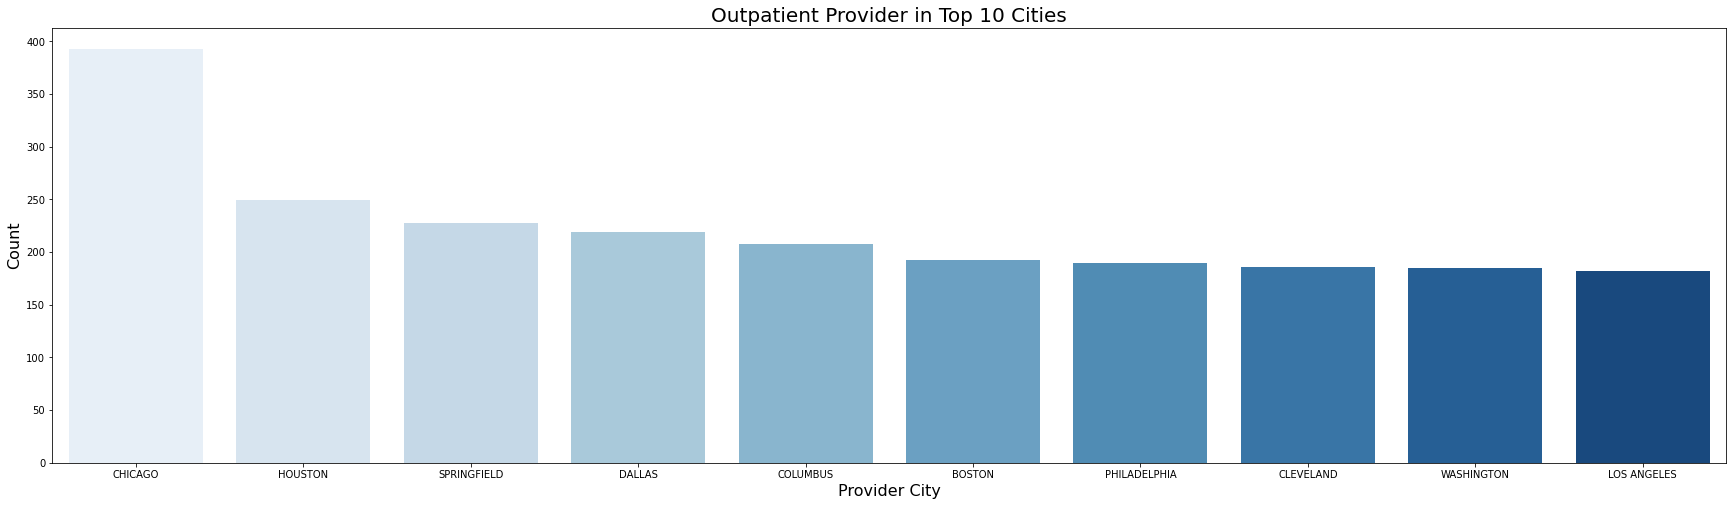

In [27]:
#Outpatient Provider City
city_count  = outpatient_df['Provider City'].value_counts()
city_count = city_count[:10,]

plt.figure(figsize=(30,8))

sns.barplot(x = city_count.index, y = city_count.values,  palette = "Blues")
plt.title('Outpatient Provider in Top 10 Cities', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Provider City', fontsize=16)
plt.show()

_Outpatient Provider in Top 10 Cities Observations_
* Chicago has the most inpatient procedures out of all the cities mentioned in the outpatient dataset (393).

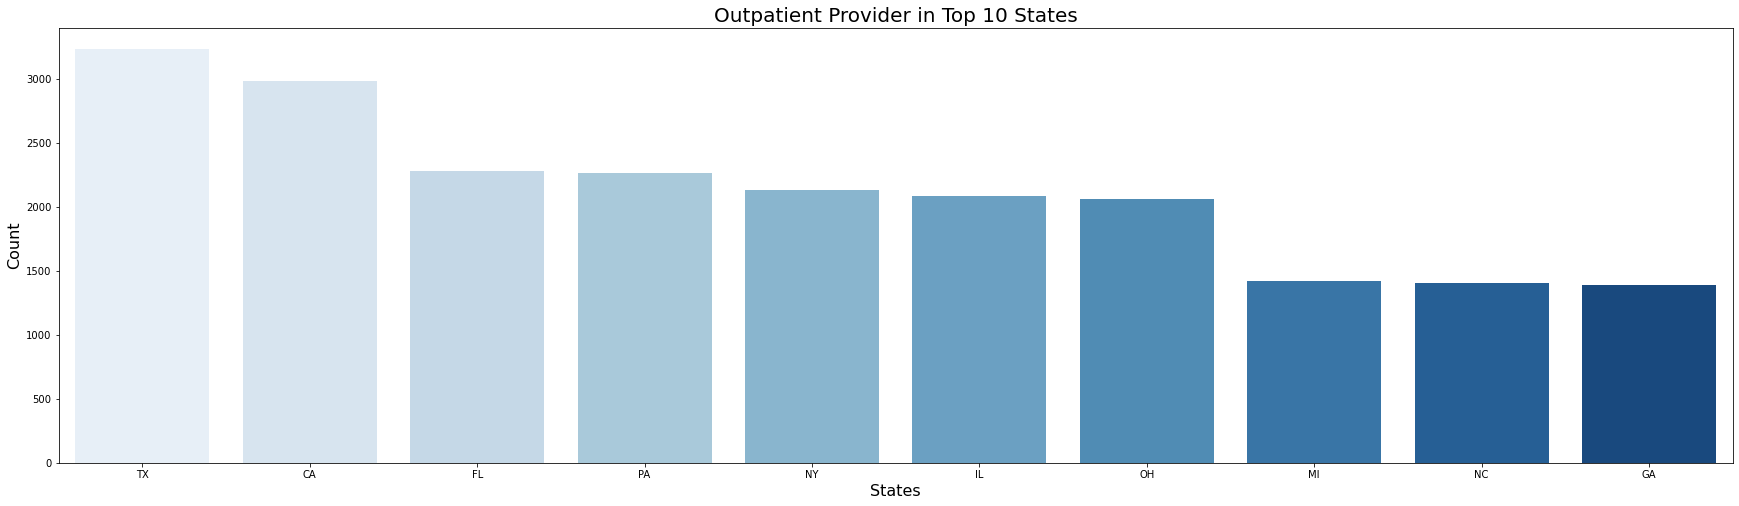

In [28]:
# Outpatient by State
state_count  = outpatient_df['Provider State'].value_counts()
state_count = state_count[:10,]

plt.figure(figsize=(30,8))

sns.barplot(x = state_count.index, y = state_count.values,  palette = "Blues")
plt.title('Outpatient Provider in Top 10 States', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('States', fontsize=16)
plt.show()


_Outpatient Provider in Top 10 States_
* Texas has the most outpatient procedures out of all the states mentioned in the outpatient dataset.
* California has the second most outpatient procedures out of all the states mentioned in the outpatient dataset.

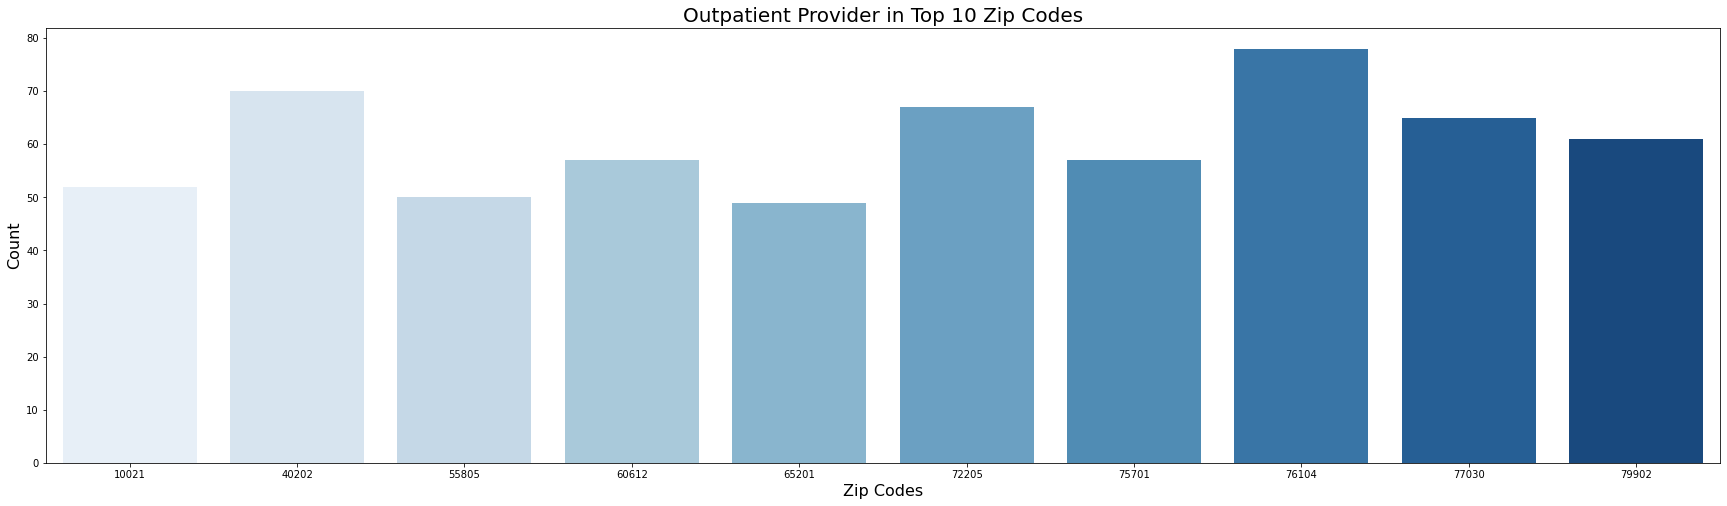

In [29]:
# Outpatient by Zip Code
zipcode_count  =outpatient_df['Provider Zip Code'].value_counts()
zipcode_count = zipcode_count[:10,]

plt.figure(figsize=(30,8))

sns.barplot(x = zipcode_count.index, y = zipcode_count.values,  palette = "Blues")
plt.title('Outpatient Provider in Top 10 Zip Codes', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Zip Codes', fontsize=16)
plt.show()

_Outpatient Provider in Top 10 ZipCodes Observations_
* Zipcode 76104 (Forth Worth, TX) had the most procedures done out all of the other zipcodes mentioned in the outpatient dataset.
* Zipcode 77030 (Houston, TX) had the second most procedures done out all of the other zipcodes mentioned in the outpatient dataset.
* Zipcode 40202 (Louisville, KY) had the third most procedures done out all of the other zipcodes mentioned in the outpatient dataset.
* Zipcode 72205 (Little Rock, AZ) had the fourth most procedures done out all of the other zipcodes mentioned in the outpatient dataset.

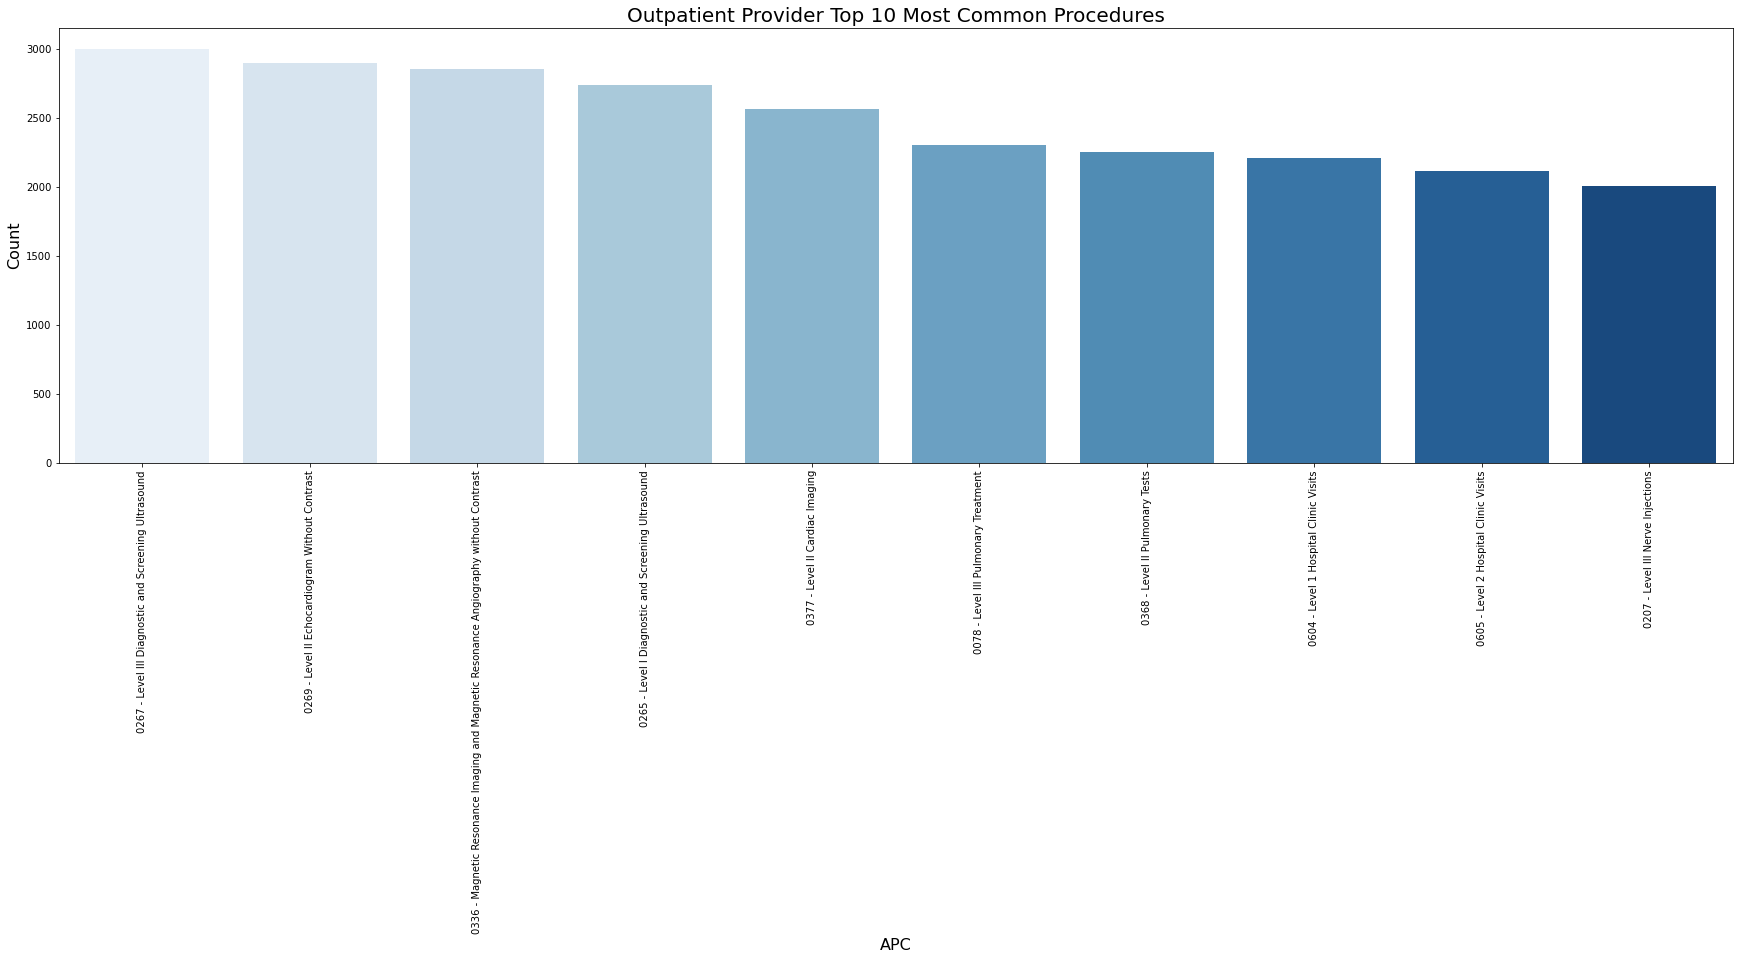

In [55]:
# Outpatient Most Common Procedures
drg_count  = outpatient_df['APC'].value_counts()
drg_count = drg_count[:10,]

plt.figure(figsize=(30,8))

sns.barplot(x = drg_count.index, y = drg_count.values,  palette = "Blues")
plt.title('Outpatient Provider Top 10 Most Common Procedures', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('APC', fontsize=16)
plt.xticks(rotation=90)
plt.show()

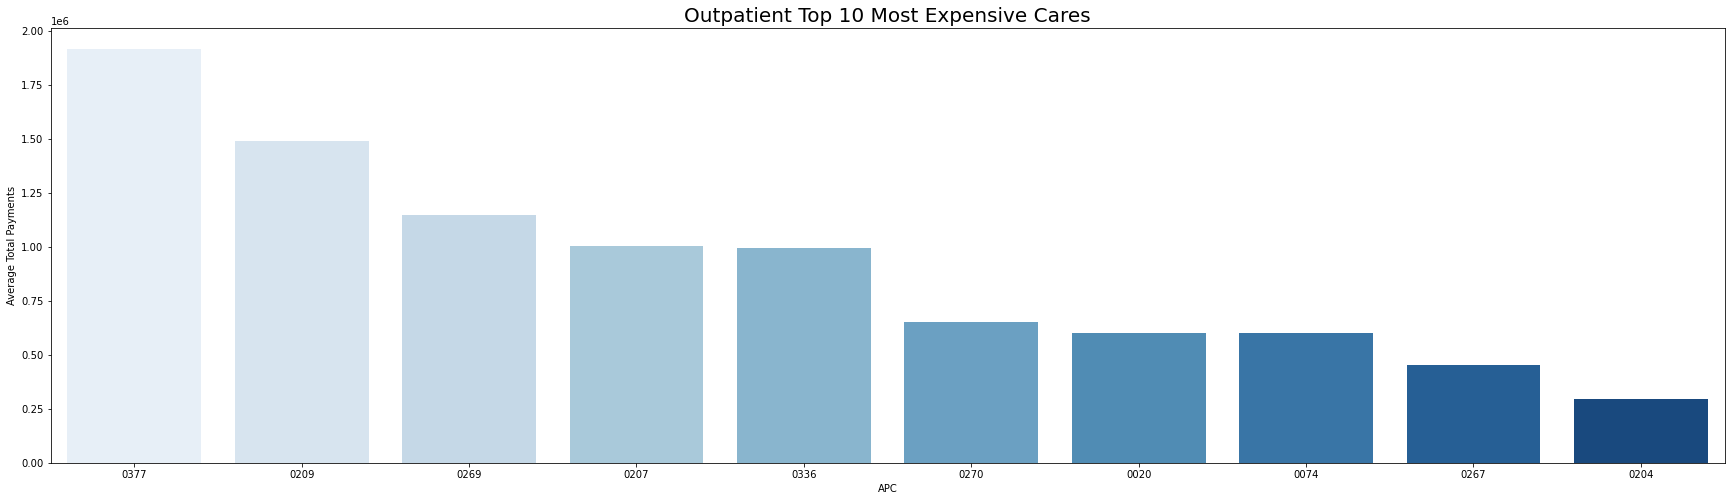

In [66]:
inp_group3 = outpatient_df.groupby('APC')['Average Total Payments'].sum().nlargest(10).reset_index()

DRG_Def = []
for i in inp_group3['APC']:
    DRG_Def.append(i[0:4])

inp = {'APC': DRG_Def, 'Average Total Payments': inp_group3['Average Total Payments']}
inpatient_top10 = pd.DataFrame(data=inp)

plt.figure(figsize=(30,8))
plt.title('Outpatient Top 10 Most Expensive Cares', fontdict = {'fontsize' : 20})
_=sns.barplot(data=inpatient_top10, x="APC", y="Average Total Payments", palette = "Blues")

plt.show()

_Outpatient Top 10 Most Expensive Cares_
* 0377 - Level II Cardiac Imaging is the most expensive procedure for outpatients.
* 0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies is the second most expensive procedure for outpatients.
* 0269 - Level II Echocardiogram Without Contrast is the third most expensive procedure for outpatients.

## Cost Comparisons Among Different States For The Same Procedures (Top 3)

In [67]:
new_inp = outpatient_df[['Provider State', 'APC', 'Average Total Payments']]

### 1. Most Expensive: 0377 - Level II Cardiac Imaging

<AxesSubplot:title={'center':'Cost Comparison Among Different States for the Same Procedure'}, xlabel='States', ylabel='Average Cost'>

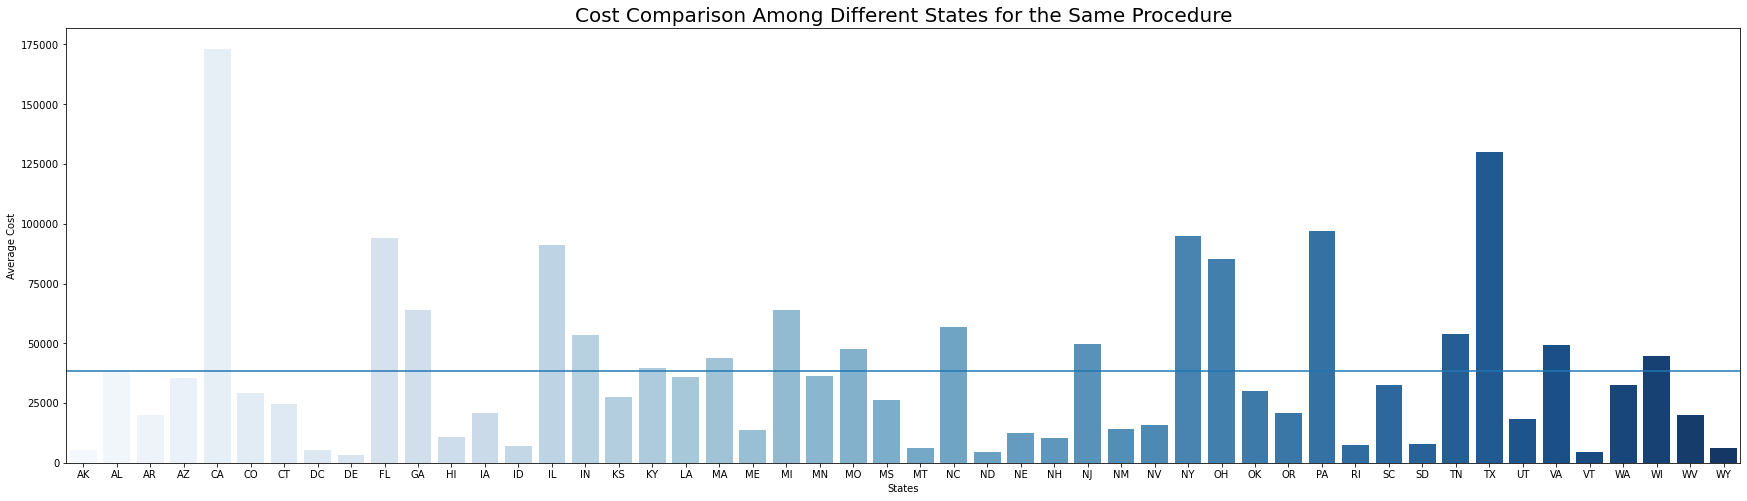

In [32]:
inp_group = new_inp[new_inp['APC'] == '0377 - Level II Cardiac Imaging']
inp_pay = inp_group.groupby(by=['Provider State'])['Average Total Payments'].sum().reset_index()
a = np.array(inp_pay['Average Total Payments'])
a_mean = np.mean(a)
b = {'States': inp_pay['Provider State'], 'Average Cost': a}

procedure_cost = pd.DataFrame(data=b)
_=plt.figure(figsize=(30,8))
_=plt.axhline(a_mean)
_=plt.title('Cost Comparison Among Different States for the Same Procedure', fontdict={'fontsize' : 20})
sns.barplot(data=procedure_cost, x='States', y='Average Cost', palette="Blues")

### 2. Second most expensive: 0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies

<AxesSubplot:title={'center':'Cost Comparison Among Different States for the Same Procedure'}, xlabel='States', ylabel='Average Cost'>

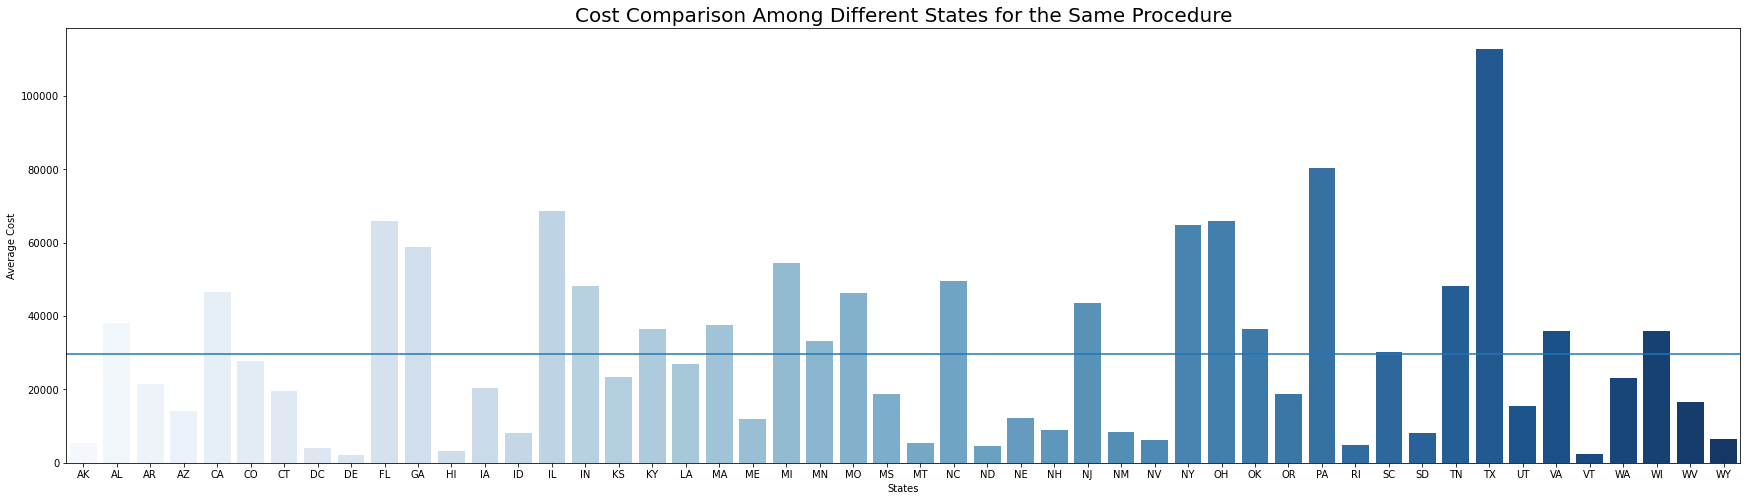

In [33]:
inp_group2 = new_inp[new_inp['APC'] == '0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies']
inp_pay2 = inp_group2.groupby(by=['Provider State'])['Average Total Payments'].sum().reset_index()
a = np.array(inp_pay2['Average Total Payments'])
a_mean = np.mean(a)
b = {'States': inp_pay2['Provider State'], 'Average Cost': a}

procedure_cost = pd.DataFrame(data=b)
_=plt.figure(figsize=(30,8))
_=plt.axhline(a_mean)
_=plt.title('Cost Comparison Among Different States for the Same Procedure', fontdict={'fontsize' : 20})
sns.barplot(data=procedure_cost, x='States', y='Average Cost', palette="Blues")

### 3. Third expensive procedure: 0269 - Level II Echocardiogram Without Contrast

<AxesSubplot:title={'center':'Cost Comparison Among Different States for the Same Procedure'}, xlabel='States', ylabel='Average Cost'>

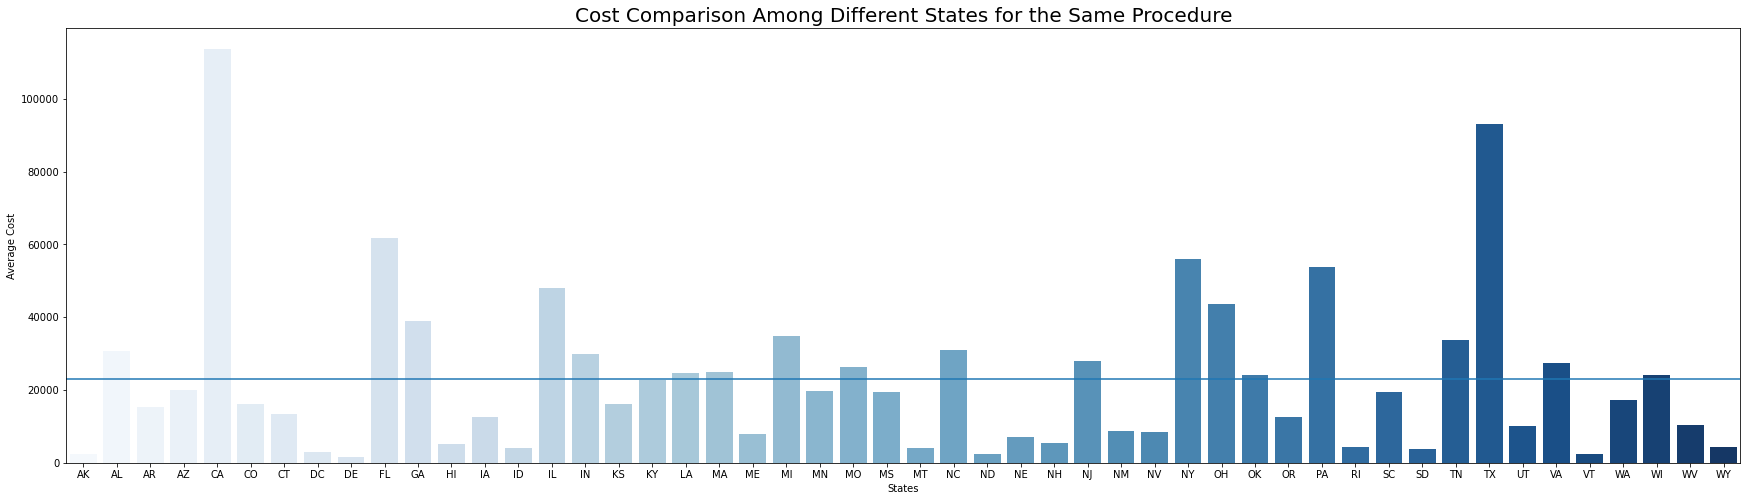

In [34]:
inp_group3 = new_inp[new_inp['APC'] == '0269 - Level II Echocardiogram Without Contrast']
inp_pay3 = inp_group3.groupby(by=['Provider State'])['Average Total Payments'].sum().reset_index()
a = np.array(inp_pay3['Average Total Payments'])
a_mean = np.mean(a)
b = {'States': inp_pay3['Provider State'], 'Average Cost': a}

procedure_cost = pd.DataFrame(data=b)
_=plt.figure(figsize=(30,8))
_=plt.axhline(a_mean)
_=plt.title('Cost Comparison Among Different States for the Same Procedure', fontdict={'fontsize' : 20})
sns.barplot(data=procedure_cost, x='States', y='Average Cost', palette="Blues")

## Outpatient Procedures Cost Among States

In [68]:
class SQLServer:
      def __init__(self, server):
        self.server = server
       
      def __enter__(self):
        self.conn: sqlite3.Connection = sqlite3.connect(self.server)
        self.cur: sqlite3.Cursor = self.conn.cursor() 
        return self
        
      def __exit__(self, exc_type, exc_val, exc_tb):
        self.conn.close()

In [69]:
_df = pd.read_csv('idea-1/medicare-data/medicare-data/Outpatient_provdr.csv')
outpatient_hospital_charges = 'outpatient_hospital_charges.db'

with SQLServer('outpatient_hospital_charges') as db:
    _df.columns = [column.strip() for column in _df.columns]
    _df.to_sql('outpatient_hospital_charges', db.conn, if_exists='replace', index=False)

In [ ]:
with SQLServer('outpatient_hospital_charges') as db:
    query = '''
SELECT `APC`, `Provider State` as providerState, t.maxAvgPaymentPerAPC
FROM outpatient_hospital_charges hc
INNER JOIN (
    SELECT `APC` as apc1, MAX(`Average Total Payments`) as maxAvgPaymentPerAPC
    FROM outpatient_hospital_charges
    GROUP BY `APC`
) t
ON hc.`APC` == t.apc1 AND hc.`Average Total Payments` == t.maxAvgPaymentPerAPC
ORDER BY providerState ASC
'''
    cursor = db.cur.execute(query)
    results = [record for record in cursor] #prints outpatient MAX Average Payment Per Procedure
    print(results)

In [79]:
_df = pd.DataFrame(results, columns=['APC', 'ProviderState', 'Payment'])

In [ ]:
with SQLServer('outpatient_hospital_charges') as db:
    ranking_by_apc = dict()
    for apc1 in outpatient_df['APC'].unique():

        query = """
            SELECT `Provider State` as providerState
            FROM outpatient_hospital_charges
            WHERE `APC` = '{apc1}' 
            GROUP BY `Provider State`
            ORDER BY AVG(`Average Total Payments`) ASC
        """.format(apc1=apc1)
    
        cursor = db.cur.execute(query)
        ranking_by_apc[apc1] = [record[0] for record in cursor]

In [96]:
for k,v in ranking_by_apc.items():
    while True:
        if len(v) >= 51:
            break
        v.append(None)

In [ ]:
apc_by_id = {key.split(' - ')[0]: key for key in ranking_by_apc.keys()}
df_rank = pd.DataFrame(ranking_by_apc)

In [ ]:
_df = pd.DataFrame(index=outpatient_df['Provider State'].unique())
for column in df_rank.columns:
    rankings_by_state = []

    if column in ['rank']:
        continue
        
    for rank, curr_state in zip(outpatient_df.index, df_rank[column]):
        rankings_by_state.append(curr_state)
    
    t = pd.DataFrame(rankings_by_state, columns=['State'])
    t['Rank'] = t.index
    t.set_index(['State'], inplace=True)
    
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
    
_df.columns = apc_by_id.keys()

In [99]:
_df.fillna(-100, inplace=True)
_df.head()

,0012,0013,0015,0019,0020,0073,0074,0078,0096,0203,...,0369,0377,0604,0605,0606,0607,0608,0690,0692,0698
AK,46.0,49,49,-100.0,-100.0,32.0,-100.0,48,48,-100.0,...,-100.0,48,48,47,47,48,-100.0,48,46.0,-100.0
AL,42.0,2,0,8.0,0.0,-100.0,3.0,2,2,8.0,...,2.0,1,1,1,1,2,2.0,1,1.0,-100.0
AR,30.0,7,4,7.0,11.0,1.0,2.0,6,5,14.0,...,3.0,5,4,5,4,3,5.0,2,12.0,3.0
AZ,28.0,29,36,27.0,32.0,28.0,18.0,32,27,32.0,...,32.0,30,33,30,32,31,29.0,29,26.0,22.0
CA,40.0,48,48,43.0,47.0,33.0,44.0,49,49,36.0,...,44.0,49,49,48,49,49,44.0,49,45.0,40.0


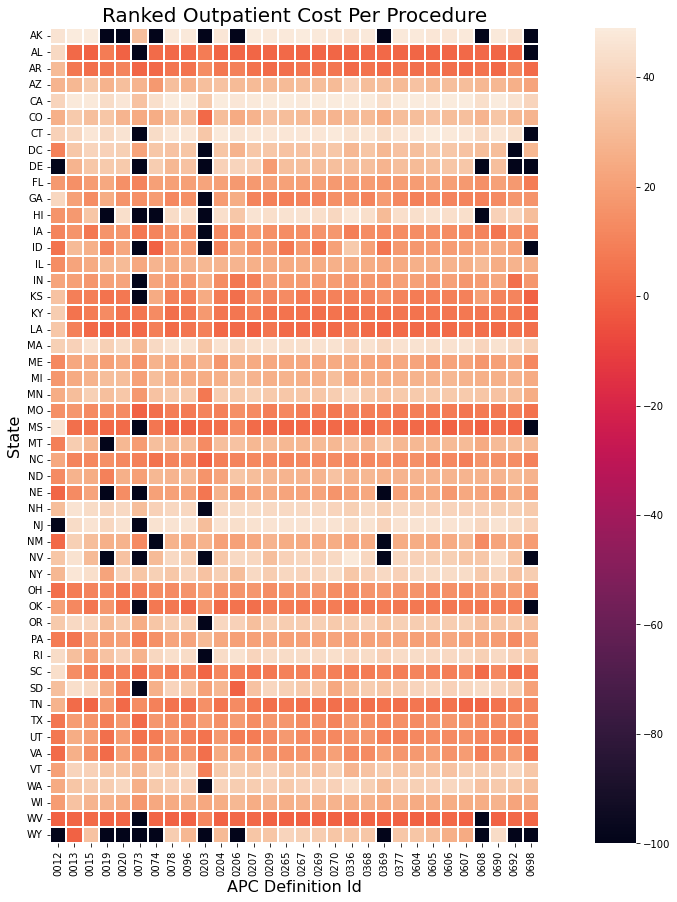

In [100]:
#darker shade = more expensive
plt.figure(figsize=(20,15))
sns.heatmap(_df, square=True, vmin=-100, cbar=True, linewidths=0.1)
plt.title('Ranked Outpatient Cost Per Procedure', fontsize=20)
plt.ylabel('State', fontsize=16)
plt.xlabel('APC Definition Id', fontsize=16)
plt.show()

_Ranked Outpatient Procedure Observations_

**The most expensive procedure per state is not to be confused with the most expensive procedure on average.**
* Wyoming is the state with the most expensive outpatient procedures (total = 11 at HIGH LEVEL). 
* Arkansas is the second state with the most expensive outpatient procedures (total = 8 at HIGH LEVEL).
* MA, CA, NY, and VT have very low cost per outpatient procedures.Perhaps they have laws that cap-out procedures at certain prices due to political standings of the states on public health. 
* WA, RI, OR, NH, IA, GA, and DC all have very low to average outpatient cost per procedure except for procedure 0203 (Level IV Nerve Injection). This particular outpatient procedure might be consider very expensive because of the stem cell therapy used for spine injuries. 

## Top 5 Most Common Procedures

In [45]:
top_5_count  = outpatient_df['APC'].value_counts()
top_5_count = top_5_count[:5,]
print(top_5_count)

0267 - Level III Diagnostic and Screening Ultrasound                                     2998
0269 - Level II Echocardiogram Without Contrast                                          2898
0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast    2855
0265 - Level I Diagnostic and Screening Ultrasound                                       2739
0377 - Level II Cardiac Imaging                                                          2564
Name: APC, dtype: int64


### Digging Dipper Into Top Common Procedure

In [46]:
#select top DRG from above list
selected_top_drg =  drg_by_id['0267']
select_provider_id = None
selected_top_drg

'0267 - Level III Diagnostic and Screening Ultrasound'

In [ ]:
df_0267 = outpatient_df[outpatient_df['APC'] == selected_top_drg]
df_0267.loc[:, 'Provider State'] = df_0267.loc[:, 'Provider State'].astype('category')
groupby_state = df_0267.groupby(by='Provider State').agg(['mean', 'min', 'max'])
groupby_state.reset_index(inplace=True)

In [48]:
# Analyze top 5 states for 0267 - Level III Diagnostic and Screening Ultrasound
groupby_state.head(5)

Provider State   Provider Id               Provider Zip Code                \
                          mean    min    max              mean    min    max   
0             AK  20011.333333  20001  20024      99640.500000  99508  99801   
1             AL  10077.022222  10001  10169      35978.477778  35007  36925   
2             AR  40054.318182  40001  40152      72304.386364  71603  72956   
3             AZ  30067.400000  30001  30126      85467.880000  85006  86442   
4             CA  50333.868313  50002  50764      93039.485597  90004  96158   

  Outpatient Services           Average  Estimated Submitted Charges  \
                 mean min   max                                 mean   
0          170.833333  87   272                           933.351478   
1          347.244444  11  4640                           850.513683   
2          277.318182  37   919                           896.679274   
3          301.220000  37   821                          1318.116687   
4          370.794239  15  4168                          1627.505907   

                           Average Total Payments                          
          min          max                   mean         min         max  
0  792.106073  1104.394912             179.672147  173.262610  191.380800  
1  293.326923  2173.770833             136.356835  127.116282  147.163810  
2  321.543478  2481.522422             139.570731  126.899808  151.635600  
3  464.226573  2390.075910             156.745145  146.843049  184.150898  
4  251.617647  7566.223986             179.479687  166.871111  211.550000

Text(0.5, 0, 'Provider State')

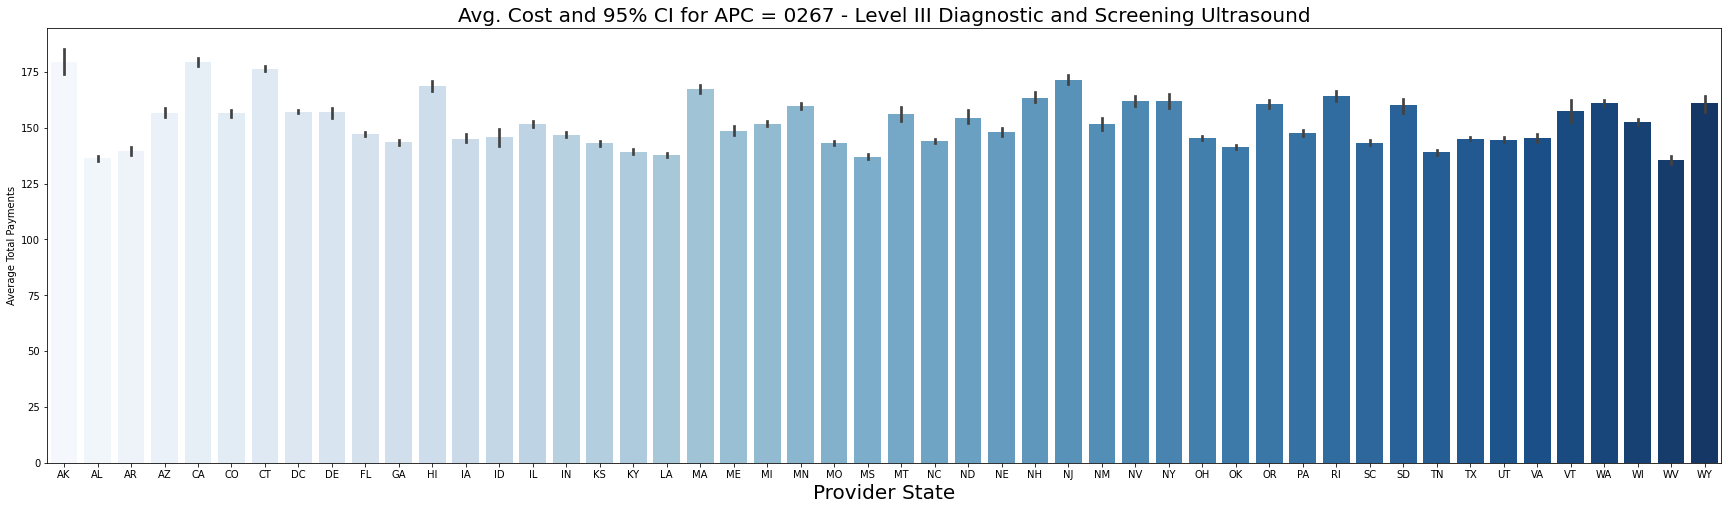

In [49]:
plt.figure(figsize=(30,8))

sns.barplot(x='Provider State', y='Average Total Payments', palette = "Blues", data=df_0267)
plt.title('Avg. Cost and 95% CI for APC = {}'.format(selected_top_drg), fontsize=20)
plt.xlabel('Average Cost ($)', fontsize=20)
plt.xlabel('Provider State', fontsize=20)

_Top Most Common Procedure Observations_
* Arkansas (AK) is the state with the highest average cost for outpatient procedure 0267 - Level III Diagnostic and Screening Ultrasound.
* Alabama (AL) is the state with the lowest average cost for 0267 - Level III Diagnostic and Screening Ultrasound.
* Most states average for outpatient procedure 0267 - Level III Diagnostic and Screening Ultrasound is around 150 - 170 dollars.